<table style="margin: 0; text-align: left; width:100%">
    <tr>
        <td style="width: 220px; height: 150px; vertical-align: middle;">
            <img src="../assets/aaa.png" width="220" height="150" style="display: block;" />
        </td>
        <td>
            <h2 style="color:#ff7800;">自律型トレーダー</h2>
            <span style="color:#ff7800;">
                MCPサーバーのツールとリソースを活用した自律型エージェントの動作を示す株式取引シミュレーション。
            </span>
        </td>
    </tr>
</table>

### 第6週、5日目

グランドフィナーレ!!

# 自律トレーダー

4人のトレーダーと1人のリサーチャーによる株式取引シミュレーション。

（各トレーダーにリサーチャーがツールとしてアシストに付く感じ）

ツールとリソースを備えた多数のMCPサーバーを活用。

...に、トレーダーのチームを追加する時間。

<table style="margin: 0; text-align: left; width:100%">
    <tr>
        <td style="width: 150px; height: 150px; vertical-align: middle;">
            <img src="../assets/tools.png" width="150" height="150" style="display: block;" />
        </td>
        <td>
            <h2 style="color:#00bfff;">MCP サーバーをどんどん追加</h2>
            <span style="color:#00bfff;">
                今後、MCP サーバーのエージェントと機能を追加していく予定です。皆さんもぜひ追加してください！今回は、コース全体で繰り返し取り上げられているプッシュ通知を追加しました。
            </span>
        </td>
    </tr>
</table>

## 4人のトレーダーを紹介します

私たちには4人のトレーダーがいて、彼らは業界の4人のタイタンに触発されています。  

- **ウォーレン**： ウォーレン・バフェットへのオマージュ  
- **ジョージ**： ジョージ・ソロスへのオマージュ  
- **レイ**： レイダリオへのオマージュ  
- **キャシー**： キャシー・ウッドへのオマージュ

彼らには、名前のあるものに触発された初期投資戦略があります。

しかし、彼らは、ツールを使用して、必要に応じて時間の経過とともに独自の戦略を変更する自律性を持っています。

ファイル `reset.py` をチェックして、初期投資の論文を読んでください。

In [1]:
# ここで、トレーダーを開始点に設定します - リセットするには、行のコメントを解除します。

from reset import reset_traders
reset_traders() # ココでリセットしたら、以下のパート１・２を実行する。

## 最終的な変更を明らかにします

`mcp_params.py` については、説明済みなので割愛、`push_server.py`、`tracers.py`は、未説明だが、`4_lab4_ja.ipynb` で実行済み。

特に、`tracers.py` はクールです：

- OpenAI Agents SDKには、トレース・コードと統合できる優れた機能があり、コードのトレースメッセージを監視できるようにします。

- `tracers.py`を参照して下さい - トレーダーのアクティビティを記録し、データベースに保存するカスタムトレーサーを作成、UIでトレーダーの内的を表現できる。

# 以下のパート１・２を実行する前に

以下のパート１・２は以下のセル中から動かすこともできるが、

同時に１・２を実行する必要があるので、実際の動作確認の際は、ターミナルで実行する必要がある。

以下は、実行時のUIイメージ（何故か全員負けてますが、タイミングなので気にしないで♨️）
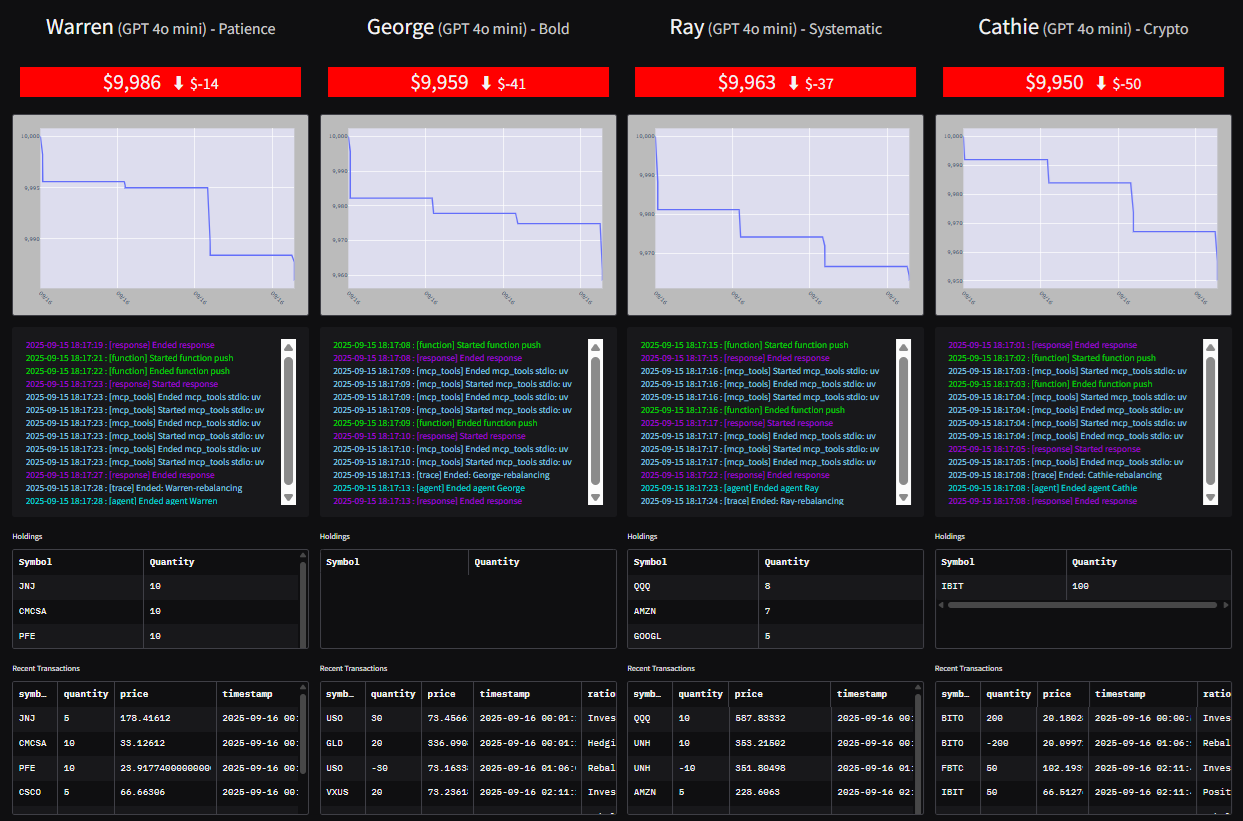

## そして今..パート1を明らかにします

### まず、.env ファイルにオプションで追加できる設定がいくつかあります。

必要に応じて、以下に変更を加えてください！

>`run_every_n_minutes = 60` 

これはトレーダーエージェントが実行される頻度を決定します。

.env ファイルで指定されていない場合は、デフォルトで 60 分ごとに実行されます。

>`run_even_when_market_is_closed = false`  

これは、トレーダーがまだ時間切れになるかどうかを決定します。

.env ファイルで指定されていない場合はデフォルトで False になります。

>`use_many_models = false`  

これは、DeepSeek APIとOpenRouterを使用して、OpenAIに加えてDeepSeek、Gemini、Grokを使用するかどうかを決定します。

.envファイルで指定されていない場合はデフォルトでFalseに設定され、その場合は `gpt-4o-mini` が全体的に使用されます。

### 次に、 `app.py` のUIコードを見てみましょう

- 新しいターミナルを開き（Shift + Ctrl +バックティック）

- このディレクトリにCDし： `cd 6_mcp`

- 次のように実行します： `uv run app.py`

そして、ユーザーインターフェイスで喜びを感じてください！

In [2]:
# 以下は誤りのような ... 4_langgraph, 5_autogenと同様に ...。
#!uv run app.py

# Jupyter Labからテスト実行していた訳なので、コチラが正しい。
!python app.py

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
gio: http://127.0.0.1:7860/: Operation not supported
^C
Keyboard interruption in main thread... closing server.


## そして今..パート2を明らかにします

### 次に、エンジンを見てください：

`trading_floor.py`

それは魔法が起こる場所である超音符のループを持っています：

```python
while True:
    await asyncio.gather(*[trader.run() for trader in traders])
    await asyncio.sleep(RUN_EVERY_N_MINUTES * 60)
```

また、環境変数をどのように見ているかがわかります。

- 新しいターミナルを開き（Shift + Ctrl +バックティック）

- このディレクトリにCDし： `cd 6_mcp`

- 次のように実行します： `uv run trading_floor.py`

ユーザーインターフェイスをご覧ください - トレーディング・チームが動作しているのをご覧ください！

In [ ]:
# 以下は誤りのような ... 4_langgraph, 5_autogenと同様に ...。
#!uv run trading_floor.py

# Jupyter Labからテスト実行していた訳なので、コチラが正しい。
!python trading_floor.py

<table style="margin: 0; text-align: left; width:100%">
    <tr>
        <td style="width: 150px; height: 150px; vertical-align: middle;">
            <img src="../assets/stop.png" width="150" height="150" style="display: block;" />
        </td>
        <td>
            <h2 style="color:#ff7800;">最後にもう一度、API の監視についてお知らせです。</h2>
            <span style="color:#ff7800;">
                これは 1 時間ごと、または指定した間隔でループ実行されます。API の使用状況を監視し、十分な時間になったら実行を停止してください。<br/>
                私は何時間も楽しくこのツールを見ています。皆さんもぜひ見てみてください！自律エージェントの威力を示す大規模なプロジェクトです。
            </span>
        </td>
    </tr>
</table>

<table style="margin: 0; text-align: left; width:100%">
    <tr>
        <td style="width: 150px; height: 150px; vertical-align: middle;">
            <img src="../assets/thanks.png" width="150" height="150" style="display: block;" />
        </td>
        <td>
            <h2 style="color:#00cc00;">本当に本当にありがとうございます！</h2>
            <span style="color:#00cc00;">
                最後まで読んでいただき、本当に感謝しています。もしもう一度言わなかったら編集者に叩かれてしまうかもしれませんが、Udemyでコースを評価していただけると大変助かります。Udemyがこのコースを他の人に公開するかどうかを決める上で最も重要な要素であり、大きな違いを生みます。<br/><br/>
                ぜひ連絡を取り合い、進捗状況をお知らせください。そして、この困難な時期に、この特別な分野でのあなたの旅を共有してください。ここまで読んでくれて、LinkedInで私と繋がるのがためらわれていた方もいるかもしれません。もう一度<a href="https://www.linkedin.com/in/eddonner/">ここにいます</a>！コースでの成果について投稿したい場合は、私をタグ付けしてください。露出を高めるために私が協力します。<br><br/>
                おめでとうございます！
            </span>
        </td>
    </tr>
</table>